In [1]:
import os, gensim

def iter_documents(top_directory):
    """Iterate over all documents, yielding a document (=list of utf8 tokens) at a time."""
    for root, dirs, files in os.walk(top_directory):
        for file in filter(lambda file: file.endswith('.txt'), files):
            document = open(os.path.join(root, file), encoding='utf8').read() # read the entire document, as one big string
            yield gensim.utils.tokenize(document, lower=True) # or whatever tokenization suits you

class MyCorpus(object):
    def __init__(self, top_dir):
        self.top_dir = top_dir
        self.dictionary = gensim.corpora.Dictionary(iter_documents(top_dir))
        self.dictionary.filter_extremes(no_below=1, keep_n=30000) # check API docs for pruning params

    def __iter__(self):
        for tokens in iter_documents(self.top_dir):
            yield self.dictionary.doc2bow(tokens)

corpus = MyCorpus('Annual_Text') # create a dictionary

In [11]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np

os.environ['DTM_PATH'] = r"C:\Users\spong\Documents\GitHub\Capstone-Project\Dynamic Topic Modeling\dtm-win64.exe"

if not os.environ.get('DTM_PATH', None):
    raise ValueError("SKIP: You need to set the DTM path")

In [9]:
time_seq = [1, 1, 1, 1, 1]

In [12]:
dtm_path = os.environ['DTM_PATH']

In [13]:
num_topics = 2

model = DtmModel(dtm_path, corpus, time_seq, num_topics=num_topics,
                 id2word=corpus.dictionary, initialize_lda=True)

In [14]:
topic_list = []

for id in range(num_topics):
    topic = [model.show_topic(topicid=id, time=time, topn=10) for time in range(5)]
    topic_list.append(topic)

In [15]:
topic_list[0]

[[(0.02654325823240403, 'saye'),
  (0.014823163026218911, 'monthly'),
  (0.011234711792051006, 'charles'),
  (0.011234711792051006, 'holley'),
  (0.008609863977657351, 'ceasing'),
  (0.008609863977657351, 'itepa'),
  (0.008592141302788434, 'relation'),
  (0.00851917159304809, 'subtotals'),
  (0.00851917159304809, 'cyberattacks'),
  (0.008428573035991154, 'buttons')],
 [(0.025044671122088327, 'saye'),
  (0.014334382987302585, 'monthly'),
  (0.011009966920568777, 'charles'),
  (0.011009966920568777, 'holley'),
  (0.008688451583905065, 'buttons'),
  (0.008567935193480673, 'subtotals'),
  (0.008567935193480673, 'cyberattacks'),
  (0.008472559135189166, 'relation'),
  (0.00844819407427192, 'itepa'),
  (0.00844819407427192, 'ceasing')],
 [(0.024975468596310557, 'saye'),
  (0.014332969145585614, 'monthly'),
  (0.011009663619102276, 'charles'),
  (0.011009663619102276, 'holley'),
  (0.008689916265765573, 'buttons'),
  (0.008569108835252658, 'subtotals'),
  (0.008569108835252658, 'cyberattacks'

In [16]:
topic_list[1]

[[(0.12044358565280402, 'prsus'),
  (0.042331169186559284, 'cty'),
  (0.024936282538935685, 'grandfathered'),
  (0.021587367285442558, 'pharma'),
  (0.021587367285442558, 'purdue'),
  (0.018922337450615983, 'acquiror'),
  (0.015684182407215263, 'omni'),
  (0.014862899792817574, 'comm'),
  (0.013797742820275303, 'flipkart'),
  (0.0129929522325719, 'super')],
 [(0.12139827302958492, 'prsus'),
  (0.04228034948861131, 'cty'),
  (0.024969545863932387, 'grandfathered'),
  (0.021600585070269636, 'pharma'),
  (0.021600585070269636, 'purdue'),
  (0.018995804131426833, 'acquiror'),
  (0.015697019614995915, 'omni'),
  (0.014883142678547512, 'comm'),
  (0.01381845464460863, 'flipkart'),
  (0.01301066464069764, 'super')],
 [(0.1174238427106997, 'prsus'),
  (0.04257698223517028, 'cty'),
  (0.02517417375240743, 'grandfathered'),
  (0.021736109706905645, 'pharma'),
  (0.021736109706905645, 'purdue'),
  (0.019052900776008463, 'acquiror'),
  (0.01580752085137438, 'omni'),
  (0.014986828281578239, 'comm'

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

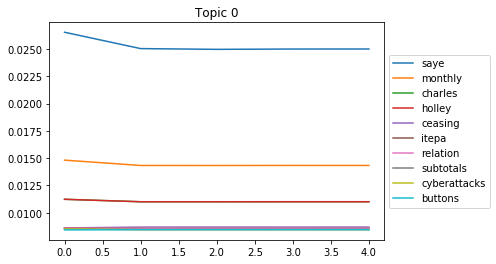

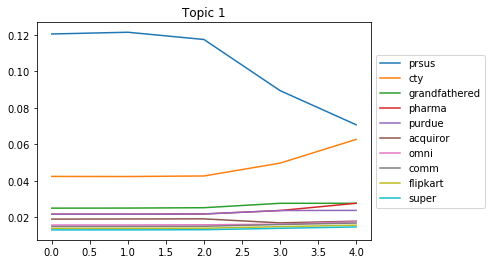

In [18]:
x = range(5)

for index, topic in enumerate(topic_list):
    plt.title("Topic " + str(index))

    for word in range(10):
        prob = [sub[word] for sub in topic]
        values = [probability[0] for probability in prob]
        plt.plot(x, values, label = prob[0][1])
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()